In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## PartI load the data

1)	Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [2]:
bat=pd.read_csv('Batting.csv')

2)	Print out the dimensions and info about the dataframe you just created

In [3]:
bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

In [4]:
bat.ndim

2

## PartII organize dataframe

In [5]:
# fill out NaN with 0 
bat['SB'].fillna(0, inplace=True)
bat['IBB'].fillna(0, inplace=True)
bat['HBP'].fillna(0, inplace=True)
bat['SF'].fillna(0, inplace=True)

In [6]:
# change data types: float to int
bat['SB']=bat['SB'].astype('int')
bat['IBB']=bat['IBB'].astype('int')
bat['HBP']=bat['HBP'].astype('int')
bat['SF']=bat['SF'].astype('int')

In [7]:
# change data types: object to category
bat["teamID"]=bat["teamID"].astype("category")
bat["lgID"]=bat["lgID"].astype("category")

In [8]:
# add columns to the dataframe
bat["PA"]=bat["AB"]+bat["BB"]+bat["HBP"]+bat["SF"]
bat["OBP"]=(bat["H"]+bat["BB"]+bat["HBP"])/bat["PA"]
bat["average"]=bat["H"]/bat["AB"]

In [9]:
# check the top rows of the dataframe
bat.head()

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0,0.0,0,0,NaN,0,NaN,4,0.000000,0.000000
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,4,0.0,0,0,NaN,0,NaN,122,0.295082,0.271186
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,2,5.0,0,0,NaN,0,NaN,139,0.302158,0.291971
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,0,2.0,0,0,NaN,0,NaN,133,0.330827,0.330827
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,2,1.0,0,0,NaN,0,NaN,122,0.336066,0.325000


## PartIII analysis of data

3)	How many players have hit 40 or more HRs in one single season? (Number only)

In [10]:
bat[bat['HR']>=40]['playerID'].nunique()

142

4)	How many players have hit more than 600 HRs for their career? (Dataframe)

In [11]:
# group by playerID, only take columns that are informative
bat_gp=bat.groupby(['playerID','nameLast','nameFirst']).agg({'birthYear':'mean', 'AB':'sum','H':'sum', 'HR':'sum',
                                                             'SB':'sum','BB':'sum','HBP':'sum','SF':'sum','2B':'sum',
                                                             '3B':'sum','PA':'sum','OBP':'mean','average':'mean',
                                                             'G':'sum'})
bat_gp[bat_gp['HR']>600]

,,,birthYear,AB,H,HR,SB,BB,HBP,SF,2B,3B,PA,OBP,average,G
playerID,nameLast,nameFirst,,,,,,,,,,,,,,
aaronha01,Aaron,Hank,1934,12364,3771,755,240,1402,32,121,624,98,13919,0.371841,0.301075,3298
bondsba01,Bonds,Barry,1964,9847,2935,762,514,2558,106,91,601,77,12602,0.441545,0.298306,2986
griffke02,Griffey,Ken,1969,9801,2781,630,184,1312,81,102,524,38,11296,0.362241,0.274764,2671
mayswi01,Mays,Willie,1931,10881,3283,660,338,1464,44,91,523,140,12480,0.379872,0.289878,2992
rodrial01,Rodriguez,Alex,1975,10566,3115,696,329,1338,176,111,548,31,12191,0.363871,0.283283,2784
ruthba01,Ruth,Babe,1895,8398,2873,714,123,2062,43,0,506,136,10503,0.440905,0.322751,2503
sosasa01,Sosa,Sammy,1968,8813,2408,609,234,929,59,78,379,45,9879,0.332724,0.268151,2354
thomeji01,Thome,Jim,1970,8422,2328,612,19,1747,69,74,451,26,10312,0.380097,0.268027,2543


5)	How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only)

In [12]:
bat[(bat['2B']>=40) & (bat['3B']>=10) & (bat['H']>=200) & (bat['HR']>=30)]["playerID"].nunique()

11

6)	How many players have had 100 or more SBs in a season? (Dataframe)

In [13]:
bat[bat['SB']>=100].drop_duplicates('playerID')

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
3473,brownpe01,Pete,Browning,1861,1887,1,LS2,AA,134,547,...,55,NaN,0,8,NaN,0,NaN,610,0.463934,0.402194
3501,comisch01,Charlie,Comiskey,1859,1887,1,SL4,AA,125,538,...,27,NaN,0,7,NaN,0,NaN,572,0.374126,0.334572
3546,fogarji01,Jim,Fogarty,1864,1887,1,PHI,NL,126,495,...,82,44.0,0,10,NaN,0,NaN,587,0.376491,0.260606
3617,lathaar01,Arlie,Latham,1860,1887,1,SL4,AA,136,627,...,45,NaN,0,5,NaN,0,NaN,677,0.366322,0.315789
3667,nicolhu01,Hugh,Nicol,1858,1887,1,CN2,AA,125,475,...,86,NaN,0,5,NaN,0,NaN,566,0.340989,0.214737
3764,wardjo01,John,Ward,1860,1887,1,NY1,NL,129,545,...,29,12.0,0,4,NaN,0,NaN,578,0.375433,0.337615
4278,hamilbi01,Billy,Hamilton,1866,1889,1,KC2,AA,137,534,...,87,41.0,0,14,NaN,0,NaN,635,0.412598,0.301498
5086,brownto01,Tom,Brown,1860,1891,1,BS2,AA,137,589,...,70,96.0,0,4,NaN,0,NaN,663,0.396682,0.320883
42681,willsma01,Maury,Wills,1932,1962,1,LAN,NL,165,695,...,51,57.0,1,2,7.0,4,7.0,752,0.347074,0.299281
51853,brocklo01,Lou,Brock,1939,1974,1,SLN,NL,153,635,...,61,88.0,16,2,2.0,1,8.0,699,0.367668,0.305512


7)	How many players in the 1960s have hit more than 200 HRs? (Dataframe)

In [22]:
# make a subset of the dataframe
bat_1960=bat[bat['yearID'].between(1960,1969)]
# calculate total HRs for those players, assign a new name
bat_1960_gp=bat_1960.groupby(["playerID","nameLast","nameFirst"]).sum()
# select those with more than 200 HRs
bat_1960_gp[bat_1960_gp["HR"]>200]

,,,birthYear,yearID,stint,G,AB,R,H,2B,3B,HR,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
playerID,nameLast,nameFirst,,,,,,,,,,,,,,,,,,,,,
aaronha01,Aaron,Hank,19340,19645,10,1540,5912,1091,1819,309,45,375,...,672,723.0,160,12,1.0,64,146.0,6660,3.759823,3.077236
allisbo01,Allison,Bob,19340,19645,10,1333,4355,712,1110,192,44,225,...,719,916.0,29,31,20.0,33,90.0,5138,3.582196,2.505957
bankser01,Banks,Ernie,19310,19645,10,1495,5554,694,1460,243,40,269,...,410,756.0,127,46,31.0,61,145.0,6071,3.147647,2.620844
cashno01,Cash,Norm,19340,19645,10,1442,4819,779,1326,175,33,278,...,778,770.0,74,58,10.0,39,102.0,5694,3.777762,2.744244
cepedor01,Cepeda,Orlando,21307,21611,12,1400,5158,773,1522,268,18,254,...,391,767.0,105,81,2.0,50,133.0,5680,3.748209,3.129338
colavro01,Colavito,Rocky,21263,21611,13,1304,4634,677,1222,194,14,245,...,676,577.0,44,22,8.0,44,137.0,5376,3.792233,2.767220
howarfr01,Howard,Frank,19360,19645,10,1370,4776,654,1315,185,30,288,...,500,1103.0,74,28,7.0,31,138.0,5335,3.431109,2.752360
kalinal01,Kaline,Al,19340,19645,10,1322,4730,811,1399,247,31,210,...,652,489.0,65,25,20.0,46,122.0,5453,3.809484,2.947476
killeha01,Killebrew,Harmon,19360,19645,10,1429,4994,864,1331,183,17,393,...,970,1029.0,98,35,0.0,43,133.0,6042,3.844874,2.640849


8)	Who has hit the most HRs in history? (Dataframe)

In [14]:
# use the grouping from no.4
bat_gp.nlargest(1,"HR")

,,,birthYear,AB,H,HR,SB,BB,HBP,SF,2B,3B,PA,OBP,average,G
playerID,nameLast,nameFirst,,,,,,,,,,,,,,
bondsba01,Bonds,Barry,1964,9847,2935,762,514,2558,106,91,601,77,12602,0.441545,0.298306,2986


9)	Who had the most hits in the 1970s? (Dataframe)

In [15]:
# get a subset of 1970s datatframe
bat_1970=bat[bat['yearID'].between(1970,1979)]
# calculate total Hits for those players, find the most
bat_1970.groupby(["playerID","nameLast","nameFirst"]).sum().nlargest(1,"H")

,,,birthYear,yearID,stint,G,AB,R,H,2B,3B,HR,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
playerID,nameLast,nameFirst,,,,,,,,,,,,,,,,,,,,,
rosepe01,Rose,Pete,19410,19745,10,1604,6523,1068,2045,394,64,79,...,783,464.0,87,50,9.0,34,111.0,7390,3.892296,3.134102


10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe)

In [16]:
bat[(bat['yearID']==1977) & (bat['PA']>=500)].nlargest(5,'OBP')

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
54603,carewro01,Rod,Carew,1945,1977,1,MIN,AL,155,616,...,69,55.0,15,3,1.0,5,6.0,693,0.448773,0.387987
55273,singlke01,Ken,Singleton,1947,1977,1,BAL,AL,152,536,...,107,101.0,13,2,0.0,6,15.0,651,0.437788,0.328358
55280,smithre06,Reggie,Smith,1945,1977,1,LAN,NL,148,488,...,104,76.0,11,3,1.0,7,5.0,602,0.426910,0.307377
54820,hargrmi01,Mike,Hargrove,1949,1977,1,TEX,AL,153,525,...,103,59.0,7,6,8.0,6,13.0,640,0.420312,0.304762
55095,morgajo02,Joe,Morgan,1943,1977,1,CIN,NL,153,521,...,117,58.0,2,2,0.0,5,5.0,645,0.417054,0.287908


11)	Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe)!

In [17]:
bat[(bat['yearID']==2013) & (bat['PA']>=300)].nlargest(8,'average')

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
97188,cabremi01,Miguel,Cabrera,1983,2013,1,DET,AL,148,555,...,90,94.0,19,5,0.0,2,19.0,652,0.441718,0.347748
98062,ramirha01,Hanley,Ramirez,1983,2013,1,LAN,NL,86,304,...,27,52.0,3,3,0.0,2,5.0,336,0.401786,0.345395
97300,cuddymi01,Michael,Cuddyer,1979,2013,1,COL,NL,130,489,...,46,100.0,5,2,0.0,3,13.0,540,0.388889,0.331288
97825,mauerjo01,Joe,Mauer,1983,2013,1,MIN,AL,113,445,...,61,89.0,7,0,0.0,2,7.0,508,0.403543,0.323596
98293,troutmi01,Mike,Trout,1991,2013,1,LAA,AL,157,589,...,110,136.0,10,9,0.0,8,8.0,716,0.431564,0.322581
97651,johnsch05,Chris,Johnson,1984,2013,1,ATL,NL,142,514,...,29,116.0,5,2,0.0,2,20.0,547,0.358318,0.321012
97437,freemfr01,Freddie,Freeman,1989,2013,1,ATL,NL,147,551,...,66,121.0,10,7,0.0,5,10.0,629,0.395866,0.319419
98043,puigya01,Yasiel,Puig,1990,2013,1,LAN,NL,104,382,...,36,97.0,6,11,0.0,3,6.0,432,0.391204,0.319372


12)	Leaders in hits from 1940 up to and including 1949. Top 10 sorted by hits.(Dataframe)

In [18]:
bat[bat['yearID'].between(1940,1949)].nlargest(10,"H")

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
33671,musiast01,Stan,Musial,1920,1948,1,SLN,NL,155,611,...,79,34.0,0,3,1.0,0,18.0,693,0.450216,0.376432
32499,musiast01,Stan,Musial,1920,1946,1,SLN,NL,156,624,...,73,31.0,0,3,2.0,0,7.0,700,0.434286,0.365385
31720,holmeto01,Tommy,Holmes,1917,1945,1,BSN,NL,154,636,...,70,9.0,0,4,3.0,0,11.0,710,0.419718,0.352201
30709,musiast01,Stan,Musial,1920,1943,1,SLN,NL,157,617,...,72,18.0,0,2,10.0,0,17.0,691,0.425470,0.356564
29747,travice01,Cecil,Travis,1913,1941,1,WS1,AL,152,608,...,52,25.0,0,1,2.0,0,13.0,661,0.409985,0.358553
32536,peskyjo01,Johnny,Pesky,1919,1946,1,BOS,AL,153,621,...,65,29.0,0,3,14.0,0,8.0,689,0.400581,0.334944
32673,vernomi01,Mickey,Vernon,1918,1946,1,WS1,AL,148,587,...,49,64.0,0,0,2.0,0,12.0,636,0.402516,0.352641
33128,peskyjo01,Johnny,Pesky,1919,1947,1,BOS,AL,155,638,...,72,22.0,0,0,9.0,0,10.0,710,0.392958,0.324451
33420,dillibo01,Bob,Dillinger,1918,1948,1,SLA,AL,153,644,...,65,34.0,0,1,12.0,0,18.0,710,0.384507,0.321429
34242,musiast01,Stan,Musial,1920,1949,1,SLN,NL,157,612,...,107,38.0,0,2,0.0,0,12.0,721,0.438280,0.338235


13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number)

In [21]:
# find the index value of the most hits for each year
bat_index=bat.groupby('yearID')["H"].nlargest(1).index.get_level_values(1)
# change the index value to series
bat_index=pd.Series(bat_index)
# return the original data with those indexes 
bat_maxH=bat.iloc[bat_index]
# find those in league NL or AL 
bat_maxH_MLB=bat_maxH[bat_maxH['lgID'].isin(['AL','NL'])]
# find the player with the most times
bat_maxH_MLB['playerID'].value_counts().head(1)[0]

7

In [22]:
# return dataframe for last question
bat_maxH[bat_maxH['playerID']=='cobbty01']

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
10699,cobbty01,Ty,Cobb,1886,1907,1,DET,AL,150,605,...,24,NaN,0,5,12.0,0,NaN,634,0.380126,0.350413
11627,cobbty01,Ty,Cobb,1886,1909,1,DET,AL,156,573,...,48,NaN,0,6,24.0,0,NaN,627,0.430622,0.376963
12708,cobbty01,Ty,Cobb,1886,1911,1,DET,AL,146,591,...,44,NaN,0,8,11.0,0,NaN,643,0.466563,0.419628
13282,cobbty01,Ty,Cobb,1886,1912,1,DET,AL,140,553,...,43,NaN,0,5,8.0,0,NaN,601,0.455907,0.408680
15352,cobbty01,Ty,Cobb,1886,1915,1,DET,AL,156,563,...,118,43.0,0,10,9.0,0,NaN,691,0.486252,0.369449
16653,cobbty01,Ty,Cobb,1886,1917,1,DET,AL,152,588,...,61,34.0,0,4,16.0,0,NaN,653,0.444104,0.382653
17680,cobbty01,Ty,Cobb,1886,1919,1,DET,AL,124,497,...,38,22.0,0,1,9.0,0,NaN,536,0.429104,0.384306


14) Which players have played the most games for their careers?  Top 5, descending by games played presented as a dataframe

In [23]:
bat_gp.sort_values('G', ascending=False).head()

,,,birthYear,AB,H,HR,SB,BB,HBP,SF,2B,3B,PA,OBP,average,G
playerID,nameLast,nameFirst,,,,,,,,,,,,,,
rosepe01,Rose,Pete,1941,14053,4256,160,198,1566,107,79,746,135,15805,0.373604,0.300677,3562
yastrca01,Yastrzemski,Carl,1939,11988,3419,452,168,1845,40,105,646,59,13978,0.377292,0.283798,3308
aaronha01,Aaron,Hank,1934,12364,3771,755,240,1402,32,121,624,98,13919,0.371841,0.301075,3298
henderi01,Henderson,Rickey,1958,10961,3055,297,1406,2190,98,67,510,66,13316,0.395748,0.269085,3081
cobbty01,Cobb,Ty,1886,11434,4189,117,892,1249,94,0,724,295,12777,0.426992,0.361045,3035


15) How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [24]:
# use group from no.4
((bat_gp['H']>3000) & (bat_gp['HR']>=500)).sum()

5

16) How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [25]:
bat[bat["yearID"]==1988]["HR"].sum()

3180

17) Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs.  I would like a dataframe sorted by average

In [26]:
bat[(bat["nameLast"]=="Boggs") & (bat['nameFirst']=="Wade") & (bat["AB"]>=500)].nlargest(3,"average")

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
62316,boggswa01,Wade,Boggs,1958,1985,1,BOS,AL,161,653,...,96,61.0,5,4,3.0,2,20.0,755,0.450331,0.367534
65391,boggswa01,Wade,Boggs,1958,1988,1,BOS,AL,155,584,...,125,34.0,18,3,0.0,7,23.0,719,0.475661,0.366438
64335,boggswa01,Wade,Boggs,1958,1987,1,BOS,AL,147,551,...,105,48.0,19,2,1.0,8,13.0,666,0.460961,0.362976


18) Please filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP.  I would like a dataframe for this

In [27]:
bat[(bat['yearID']==1995) & (bat['PA']>=400)].sort_values("OBP",ascending=False)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
73578,martied01,Edgar,Martinez,1963,1995,1,SEA,AL,145,511,...,116,87.0,19,8,0.0,4,11.0,639,0.478873,0.356164
73996,thomafr04,Frank,Thomas,1968,1995,1,CHA,AL,145,493,...,136,74.0,29,6,0.0,12,14.0,647,0.454405,0.308316
73611,mcgwima01,Mark,McGwire,1963,1995,1,OAK,AL,104,317,...,88,77.0,5,11,0.0,6,9.0,422,0.440758,0.274448
73999,thomeji01,Jim,Thome,1970,1995,1,CLE,AL,137,452,...,97,113.0,3,5,0.0,3,8.0,557,0.438061,0.314159
73002,bondsba01,Barry,Bonds,1964,1995,1,SFN,NL,144,506,...,120,83.0,22,5,0.0,4,12.0,635,0.431496,0.294466
73875,salmoti01,Tim,Salmon,1968,1995,1,CAL,AL,143,537,...,91,111.0,2,6,0.0,4,9.0,638,0.429467,0.329609
73145,davisch01,Chili,Davis,1960,1995,1,CAL,AL,119,424,...,89,79.0,12,0,0.0,9,12.0,522,0.429119,0.318396
73560,magadda01,Dave,Magadan,1962,1995,1,HOU,NL,127,348,...,71,56.0,9,0,1.0,2,9.0,421,0.427553,0.313218
73495,knoblch01,Chuck,Knoblauch,1968,1995,1,MIN,AL,136,538,...,78,95.0,3,10,0.0,3,15.0,629,0.424483,0.332714
73671,naehrti01,Tim,Naehring,1967,1995,1,BOS,AL,126,433,...,77,66.0,5,4,4.0,2,16.0,516,0.414729,0.307159


19) Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with just the leader

In [28]:
bat_4yr=bat[bat['yearID'].isin([1922,1925,1926,1928])]
bat_4yr.groupby(['playerID','nameLast','nameFirst']).sum().nlargest(1,'3B')

,,,birthYear,yearID,stint,G,AB,R,H,2B,3B,HR,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
playerID,nameLast,nameFirst,,,,,,,,,,,,,,,,,,,,,
walkecu01,Walker,Curt,7584,7701,4,571,2088,335,652,97,59,30,...,222,122.0,0,5,81.0,0,NaN,2315,1.513024,1.240789


20) How many players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [29]:
bat[(bat['HR']>=30) & (bat['SB']>=30)]["playerID"].nunique()

37

21) Who had the highest OBP in 1986 with at least 400 PAs? (Dataframe)

In [30]:
bat[(bat["yearID"]==1986) & (bat["PA"]>=400)].nlargest(1,"OBP")

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
63320,boggswa01,Wade,Boggs,1958,1986,1,BOS,AL,149,580,...,105,44.0,14,0,4.0,4,11.0,689,0.45283,0.356897


22) Same question but for 1997 and only in the NL (check league ID)? (Dataframe)

In [31]:
bat[(bat["yearID"]==1997) & (bat["PA"]>=400) & (bat["lgID"]=="NL")].nlargest(1,"OBP")

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
76562,walkela01,Larry,Walker,1966,1997,1,COL,NL,153,568,...,78,90.0,14,14,0.0,4,15.0,664,0.451807,0.366197


23) Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)? (Dataframe)

In [32]:
HR_mean=bat[bat["yearID"]==2012]["HR"].mean()
bat[(bat["yearID"]==2012) & (bat["HR"]>HR_mean) & (bat["PA"]>=500)]

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
95603,ackledu01,Dustin,Ackley,1988,2012,1,SEA,AL,153,607,...,59,124.0,7,0,1.0,1,3.0,667,0.293853,0.225700
95616,alonsyo01,Yonder,Alonso,1987,2012,1,SDN,NL,155,549,...,62,101.0,9,3,1.0,4,14.0,618,0.347896,0.273224
95617,altuvjo01,Jose,Altuve,1990,2012,1,HOU,NL,147,576,...,40,74.0,0,6,4.0,4,8.0,626,0.340256,0.289931
95619,alvarpe01,Pedro,Alvarez,1987,2012,1,PIT,NL,149,525,...,57,180.0,6,1,0.0,3,10.0,586,0.317406,0.243810
95629,aokino01,Nori,Aoki,1982,2012,1,MIL,NL,151,520,...,43,55.0,1,13,7.0,5,6.0,581,0.354561,0.288462
95641,avilemi01,Mike,Aviles,1981,2012,1,BOS,AL,136,512,...,23,77.0,0,2,3.0,6,6.0,543,0.281768,0.250000
95645,aybarer01,Erick,Aybar,1984,2012,1,LAA,AL,141,517,...,22,61.0,1,5,7.0,2,11.0,546,0.324176,0.290135
95659,barneda01,Darwin,Barney,1985,2012,1,CHN,NL,156,548,...,33,58.0,1,3,3.0,1,11.0,585,0.299145,0.253650
95678,beckhgo01,Gordon,Beckham,1986,2012,1,CHA,AL,151,525,...,40,89.0,0,7,8.0,2,10.0,574,0.296167,0.234286
95687,beltrad01,Adrian,Beltre,1979,2012,1,TEX,AL,156,604,...,36,82.0,8,5,0.0,9,8.0,654,0.359327,0.321192


24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe)

In [33]:
bat[bat["HR"]>=50].sort_values("birthYear", ascending=False).head(1)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,average
97312,davisch02,Chris,Davis,1986,2013,1,BAL,AL,160,584,...,72,199.0,12,10,0.0,7,4.0,673,0.369985,0.285959


25) Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe)

In [34]:
# use group from no.4
bat_gp[bat_gp["HR"]>=300].sort_values("birthYear",ascending=False).head()

,,,birthYear,AB,H,HR,SB,BB,HBP,SF,2B,3B,PA,OBP,average,G
playerID,nameLast,nameFirst,,,,,,,,,,,,,,
fieldpr01,Fielder,Prince,1984,5821,1645,319,18,847,124,61,321,10,6853,0.370907,0.278103,1611
encared01,Encarnacion,Edwin,1983,5409,1439,310,56,662,81,50,311,8,6202,0.344458,0.259464,1513
cabremi01,Cabrera,Miguel,1983,7853,2519,446,38,1011,57,75,523,17,8996,0.397077,0.319668,2096
gonzaad01,Gonzalez,Adrian,1982,6739,1954,308,6,751,44,67,415,12,7601,0.349163,0.283408,1804
pujolal01,Pujols,Albert,1980,9138,2825,591,107,1214,100,99,602,16,10551,0.390729,0.308914,2426


## PartIV visualization

Graph total HRs per season using bar graph

Text(0.5,0.98,'total HRs per person')

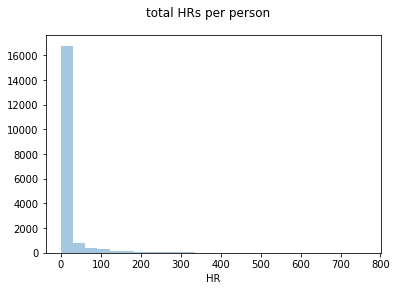

In [35]:
# use the group from no.4
sns.distplot(bat_gp['HR'], bins=25, kde=False)
plt.suptitle('total HRs per person')

Using a line graph please graph the average HRs per AB (think about this) per season

Text(0.5,0.98,'average HRs per AB per person')

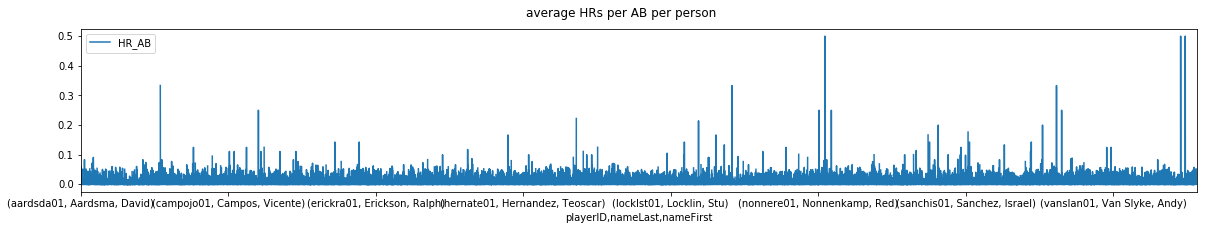

In [36]:
bat_HRAB=bat.groupby(['playerID','nameLast','nameFirst']).mean()
bat_HRAB['HR_AB']=bat_HRAB['HR']/bat_HRAB['AB']
bat_HRAB.plot.line(x=bat_HRAB.index, y='HR_AB', figsize=(20,3))
plt.suptitle('average HRs per AB per person')